## Page View Time Series Visualiser

Final project for the **Data Analysis with Python** course offerede by [Free Code Camp](https://www.freecodecamp.org/learn/data-analysis-with-python/#data-analysis-with-python-course).

Check my certificate [here](https://freecodecamp.org/certification/fcc2a39db6b-7401-45ce-9f42-82b2673914c5/data-analysis-with-python-v7).

In [8]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.plotting import register_matplotlib_converters

For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:

- Use Pandas to import the data from "fcc-forum-pageviews.csv".



In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv')
df["date"] = pd.to_datetime(df['date'], dayfirst = True)
df = df.set_index('date')
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


- Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.


In [3]:
df_clean = df[
    (df['value'] >= df['value'].quantile(0.025)) & 
    (df['value'] <= df['value'].quantile(0.975))
]

- Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.


Text(0, 0.5, 'Page Views')

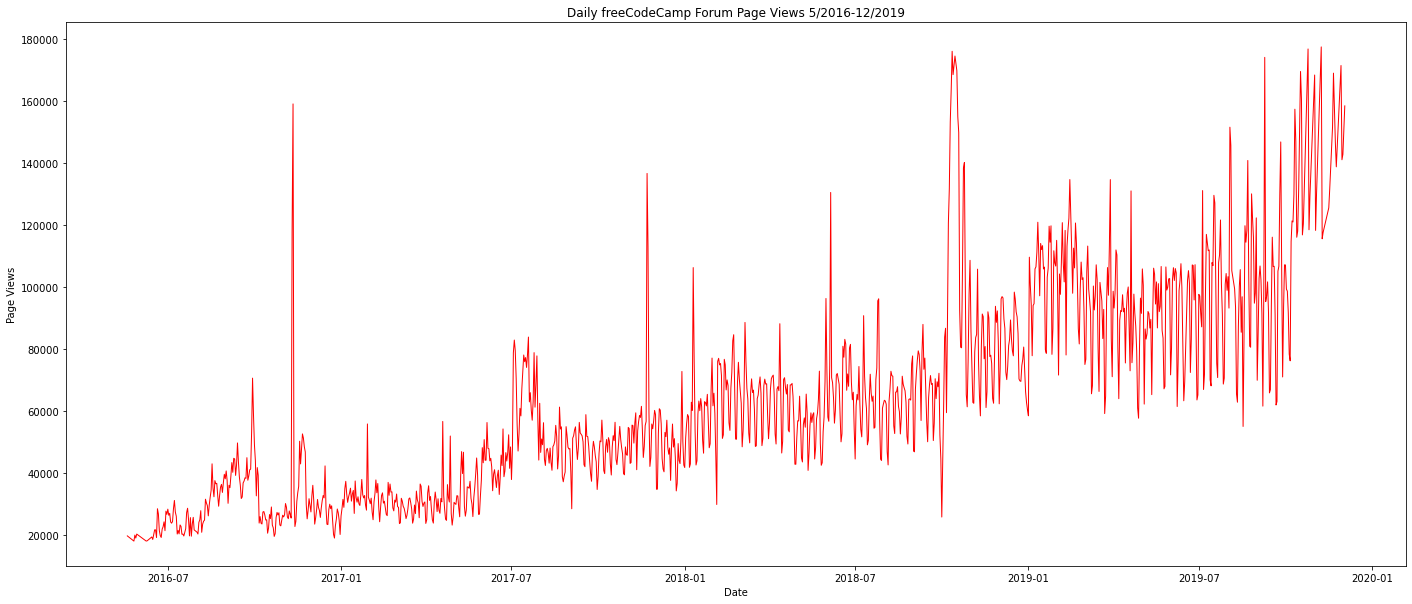

In [4]:
fig = plt.figure(figsize =(24, 10))
plt.plot(df_clean, color = 'red', linewidth = 1)
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel("Date")
plt.ylabel("Page Views")

- Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.


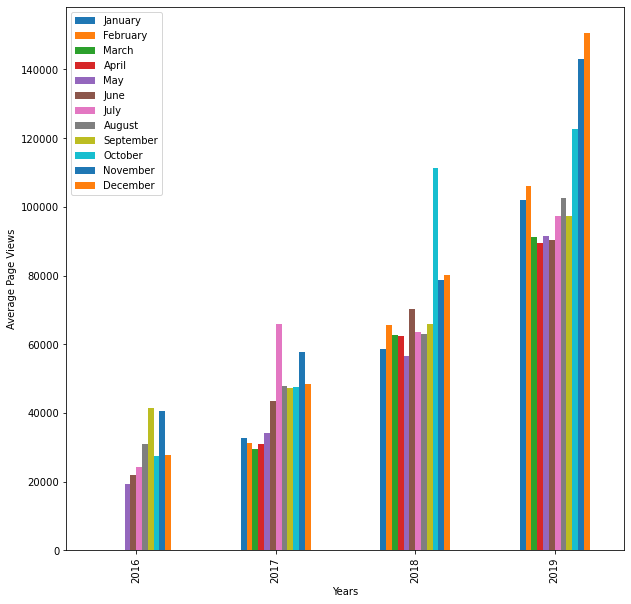

In [5]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
fig, ax = plt.subplots(figsize=(10,10))
bar_plot = df_clean.groupby([df_clean.index.year, df_clean.index.month]).mean().unstack()
bar_plot.plot(ax = ax, kind='bar')
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')
ax.legend(months)


Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.
For each chart, make sure to use a copy of the data frame. Unit tests are written for you under test_module.py.

In [6]:
df_box = df_clean.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

Text(0, 0.5, 'Page Views')

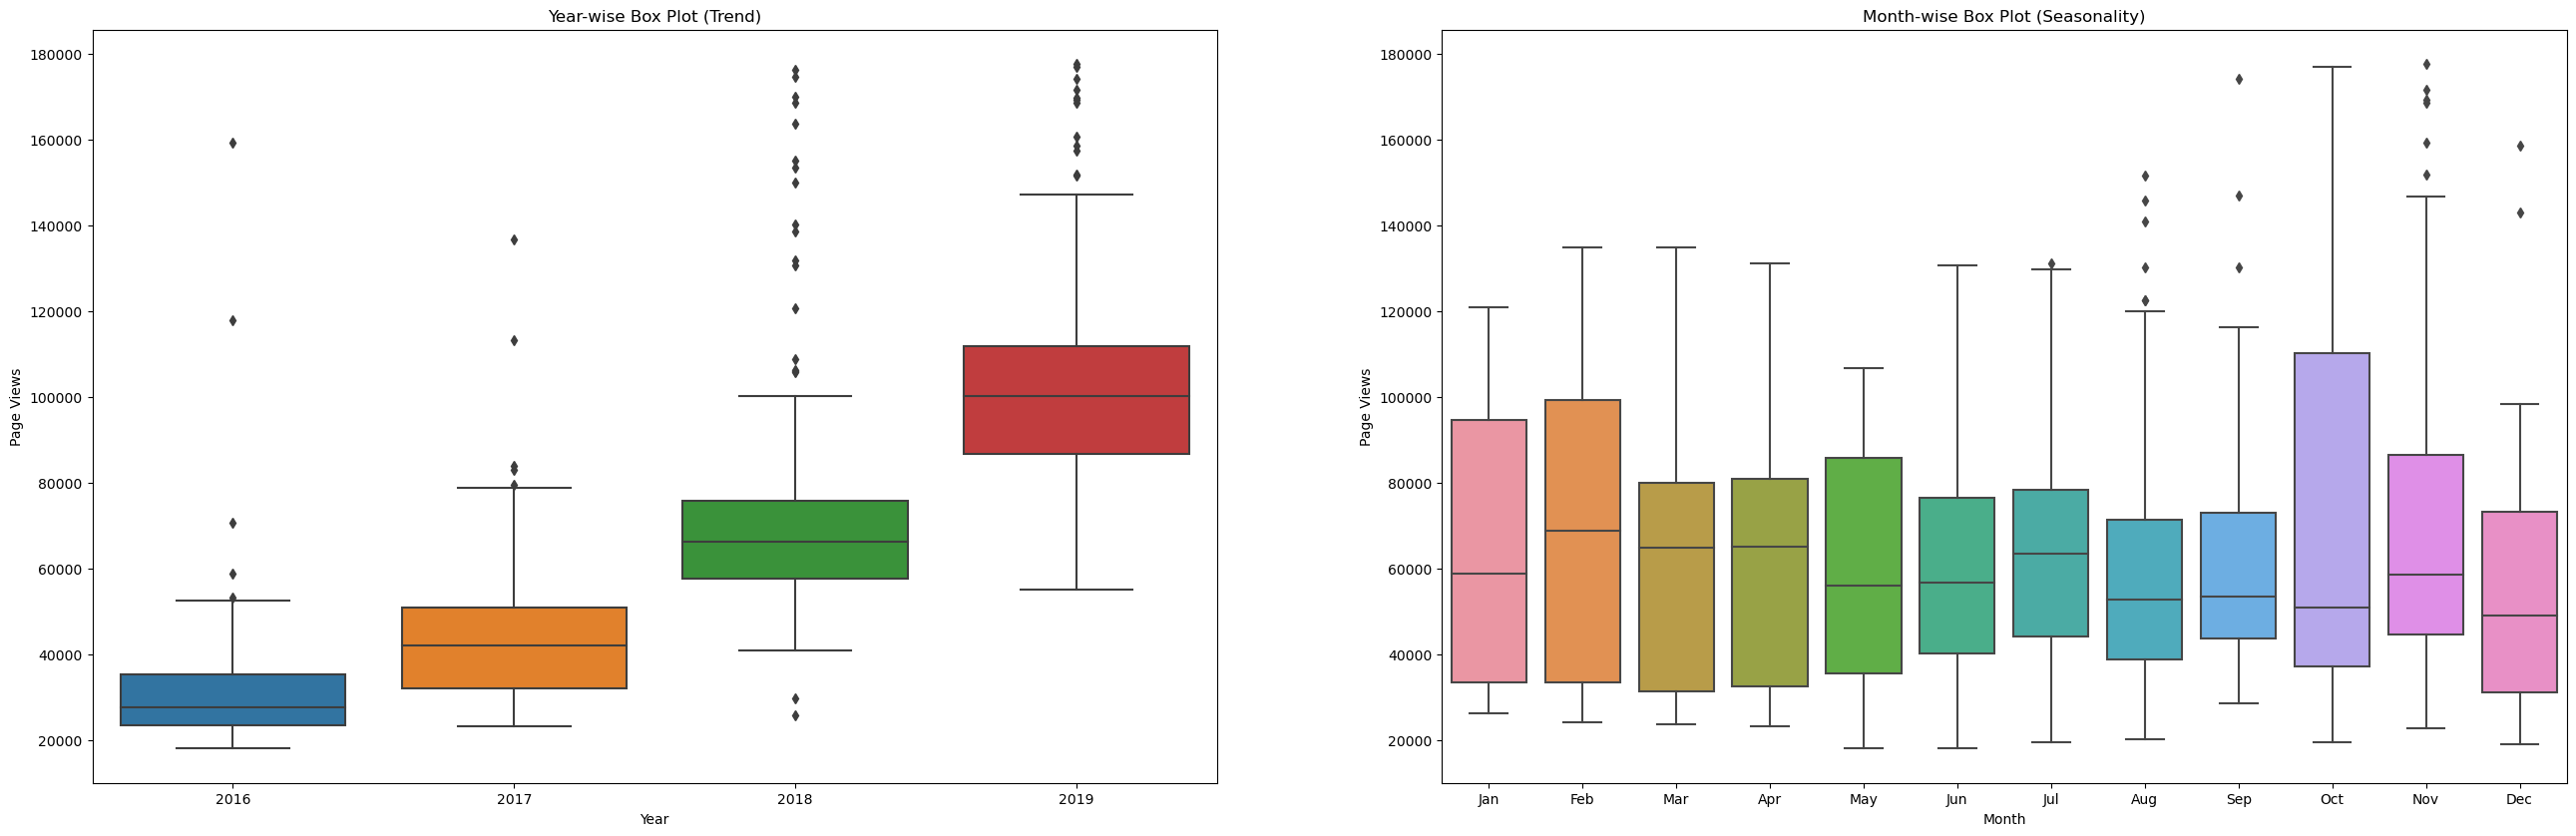

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(32, 10), dpi=100)
 
sns.boxplot(data=df_box, x="year", y="value", ax=axes[0])
axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")
    
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sns.boxplot(data=df_box, x="month", y="value", order=month_order, ax=axes[1])
axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page Views")

    